In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

In [12]:
X = tf.placeholder(tf.float32, [None, 784]) # input
Y = tf.placeholder(tf.float32, [None, 10]) # output

keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y:batch_ys, keep_prob: 0.8})
        total_cost += cost_val
    print("Epoch:", "%04d" % (epoch + 1), 
          "Avg. cost =", "{:.3f}".format(total_cost/total_batch))

print("최적화 완료")
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print("정확도:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob: 1}))

Epoch: 0001 Avg. cost = 0.427
Epoch: 0002 Avg. cost = 0.164
Epoch: 0003 Avg. cost = 0.116
Epoch: 0004 Avg. cost = 0.090
Epoch: 0005 Avg. cost = 0.074
Epoch: 0006 Avg. cost = 0.060
Epoch: 0007 Avg. cost = 0.052
Epoch: 0008 Avg. cost = 0.048
Epoch: 0009 Avg. cost = 0.041
Epoch: 0010 Avg. cost = 0.039
Epoch: 0011 Avg. cost = 0.033
Epoch: 0012 Avg. cost = 0.033
Epoch: 0013 Avg. cost = 0.028
Epoch: 0014 Avg. cost = 0.028
Epoch: 0015 Avg. cost = 0.025
최적화 완료
정확도: 0.9818


In [14]:
labels = sess.run(model, feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1})

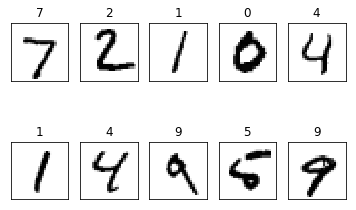

In [19]:
fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)), cmap=plt.cm.gray_r)
plt.show()

# CNN

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [22]:
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)

In [25]:
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))
L1 = tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding='SAME') # SAME : 외곽에서 한칸 밖으로 움직임
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

W3 = tf.Variable(tf.random_normal([7*7*64, 256], stddev=0.01))
L3 = tf.reshape(L2, [-1, 7*7*64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)

W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L3, W4)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)
        
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y:batch_ys, keep_prob: 0.8})
        total_cost += cost_val
    print("Epoch:", "%04d" % (epoch + 1), 
          "Avg. cost =", "{:.3f}".format(total_cost/total_batch))

print("최적화 완료")
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print("정확도:", sess.run(accuracy, feed_dict={X:mnist.test.images.reshape(-1, 28, 28, 1),
                                            Y:mnist.test.labels, keep_prob: 1}))

Epoch: 0001 Avg. cost = 0.335
Epoch: 0002 Avg. cost = 0.098
Epoch: 0003 Avg. cost = 0.070
Epoch: 0004 Avg. cost = 0.053
Epoch: 0005 Avg. cost = 0.044
Epoch: 0006 Avg. cost = 0.037
Epoch: 0007 Avg. cost = 0.030
Epoch: 0008 Avg. cost = 0.028
Epoch: 0009 Avg. cost = 0.025
Epoch: 0010 Avg. cost = 0.021
Epoch: 0011 Avg. cost = 0.017
Epoch: 0012 Avg. cost = 0.016
Epoch: 0013 Avg. cost = 0.016
Epoch: 0014 Avg. cost = 0.014
Epoch: 0015 Avg. cost = 0.013
최적화 완료
정확도: 0.9898


In [26]:
# highlevel api를 사용하면 더 빠르게 만들 수 있음
L1 = tf.layers.conv2d(X, 32, [3,3])
L1 = tf.layers.max_pooling2d(L1, [2,2], [2,2])


# fully connected layer
L3 = tf.contrib.layers.flatten(L2)
L3 = tf.layers.dense(L3, 256, activation=tf.nn.relu)

# AutoEncoder

In [27]:
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [28]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28*28

X = tf.placeholder(tf.float32, [None, n_input])

Epoch: 0001 Avg. cost = 0.204
Epoch: 0002 Avg. cost = 0.055
Epoch: 0003 Avg. cost = 0.045
Epoch: 0004 Avg. cost = 0.038
Epoch: 0005 Avg. cost = 0.035
Epoch: 0006 Avg. cost = 0.032
Epoch: 0007 Avg. cost = 0.030
Epoch: 0008 Avg. cost = 0.029
Epoch: 0009 Avg. cost = 0.028
Epoch: 0010 Avg. cost = 0.027
Epoch: 0011 Avg. cost = 0.026
Epoch: 0012 Avg. cost = 0.025
Epoch: 0013 Avg. cost = 0.025
Epoch: 0014 Avg. cost = 0.025
Epoch: 0015 Avg. cost = 0.024
최적화 완료


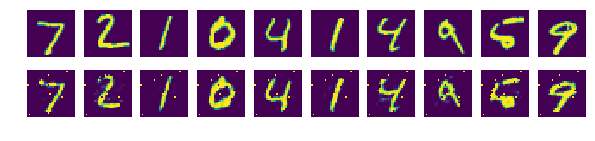

In [31]:
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

cost = tf.reduce_mean(tf.pow(X-decoder, 2))

optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y:batch_ys, keep_prob: 0.8})
        total_cost += cost_val
    print("Epoch:", "%04d" % (epoch + 1), 
          "Avg. cost =", "{:.3f}".format(total_cost/total_batch))

print("최적화 완료")

sample_size = 10
samples = sess.run(decoder, feed_dict={X:mnist.test.images[:sample_size]})
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    ax[1][i].imshow(np.reshape(samples[i], (28,28)))
plt.show()